# Exploratorive Analysis of the log Dataset 'sample.csv'

## Data science packages importation

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
# package handling hash token in python
import secrets
import random
from datetime import datetime, timedelta
import calendar

## Datasets loading

In [330]:
logs = pd.read_csv("sample.csv")
df = pd.read_csv("metadata.csv")

## Datasets Exploration

In [331]:
# Let's visualize logs in quick sight
logs.head()

,user,anonymous,event_id,question_id,sent_at
0,656f1d964407d1872251cb1d,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:44:54
1,656f1d964407d1872253ae23,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:02
2,656f1d964407d18722559129,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:06
3,656f1d964407d1872257742f,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:03
4,656f1d964407d18722595735,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:00


In [332]:
# Let's visualize df in quick sight
df.head()

,column,data type,description
0,type,character,Type of action performed by the Wooclap user i...
1,event_id,character,Unique ID of the Wooclap event that includes t...
2,participant_id,character,Unique ID of a Wooclap participant.
3,created_at,character or integer,"Timestamp of the action, the timezone is UTC. ..."
4,object_id,character,"When type = ‘question-answer’, it is the uniqu..."


In [333]:
# Shapes of the logs and df datasets
print("logs shape is", logs.shape)
print("df shape is", df.shape)

logs shape is (10171, 5)
df shape is (5, 3)


We realize the metadata is indeed a short datasets giving additionnal information about datatypes, description of the variables we can see in the logs datasets

In [334]:
# Identify datatypes in logs
logs.dtypes

user           object
anonymous        bool
event_id       object
question_id    object
sent_at        object
dtype: object

We can already imagine changing the data type of "sent_at" from object to date type

### Missing values Handling

In [335]:
# Checking for missing values in every columns of the logs datasets
logs.isna().sum()

user           0
anonymous      0
event_id       0
question_id    0
sent_at        0
dtype: int64

No missing values, the datasets is quiet clean.

### Duplicated rows Handling

In [336]:
# Checking for duplicated rows accross the logs dataset
logs.duplicated().sum()

np.int64(0)

No duplicated rows as well.

### Dataset description

In [337]:
logs.describe()

,user,anonymous,event_id,question_id,sent_at
count,10171,10171,10171,10171,10171
unique,1861,2,19,101,3885
top,6569f124c8204338d3a34f4a,False,630ea3f338d12f4c710d9b21,65ade14568d12f4c710d9b21,2021-06-04 21:32:00
freq,7,9150,1192,471,109


## Data Manipulation

### 'sent_at' variable handling

In [338]:
# Converting 'sent_at' vatiables to date
logs['sent_at'] = pd.to_datetime(logs["sent_at"])
# Breaking the sent_at variables into Date, year, month, hour and min
logs['date'] = logs["sent_at"].dt.date
logs['year'] = logs["sent_at"].dt.year
logs['month'] = logs["sent_at"].dt.month
logs['day'] = logs["sent_at"].dt.day
logs['time'] = logs['sent_at'].dt.time
logs.head()

,user,anonymous,event_id,question_id,sent_at,date,year,month,day,time
0,656f1d964407d1872251cb1d,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:44:54,2021-06-02,2021,6,2,10:44:54
1,656f1d964407d1872253ae23,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:02,2021-06-02,2021,6,2,10:45:02
2,656f1d964407d18722559129,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:06,2021-06-02,2021,6,2,10:45:06
3,656f1d964407d1872257742f,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:03,2021-06-02,2021,6,2,10:45:03
4,656f1d964407d18722595735,False,6303a2efd17411f83093d2bc,6307944103fe421ca1d28bd3,2021-06-02 10:45:00,2021-06-02,2021,6,2,10:45:00


In [339]:
# let's delete the sent_at variable and the question_id variable that will not serve our analysis.
# axis = 1 target the columns
logs = logs.drop('sent_at', axis = 1)
logs = logs.drop('question_id', axis = 1)
logs.head()

,user,anonymous,event_id,date,year,month,day,time
0,656f1d964407d1872251cb1d,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:44:54
1,656f1d964407d1872253ae23,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:02
2,656f1d964407d18722559129,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:06
3,656f1d964407d1872257742f,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:03
4,656f1d964407d18722595735,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:00


I choose to keep Date variable and not to drop it from the logs as it can help with filtering later.

Now let's try to understand how these logs work to identify an algorithm to group the lines belonging to the same session.

From my interpretation, a session is first linked to the event_id. differents event_id imply different sessions. on the second hand, in order to separates all the sessions that can fall into the same event_id, we will proceed with a time based algorithm that consider that with the same event_id, rows belonging to the same session are close to each other in time. When an event is happening on the same day, 2 differents sessions are possibles, morning session and afternoon session.

## Sessions Identification

In [340]:
#Funtion enabling to retun the period of day (morning or afternoon) based on time value
def morn_aft(time):
    if time.hour < 13:
        return 'Morning'
    else:
        return 'Afternoon'
    
# Let's apply the morn_aft funtion to our dataset to create the variable 'period' 
    
logs['period'] = logs["time"].apply(morn_aft)
logs.head()

,user,anonymous,event_id,date,year,month,day,time,period
0,656f1d964407d1872251cb1d,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:44:54,Morning
1,656f1d964407d1872253ae23,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:02,Morning
2,656f1d964407d18722559129,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:06,Morning
3,656f1d964407d1872257742f,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:03,Morning
4,656f1d964407d18722595735,False,6303a2efd17411f83093d2bc,2021-06-02,2021,6,2,10:45:00,Morning


Let's verify that the right period is assigned to the right time

In [341]:
df = logs[logs['period'] == 'Morning']
df[['time','period']].shape

(1839, 2)

In [342]:
df = logs[logs['period'] == 'Afternoon']
df[['time','period']].shape

(8332, 2)

Our rows are then all labelised and we can also checked the column 'period' has no missing values

In [343]:
print('number of missing values in period column : ',logs['period'].isna().sum())

number of missing values in period column :  0


Let's create a function that associate each session to an session_id

instead of generating a hash for session_id, let's create a specifiq session_id as a combination of event_id + date + period char

In [347]:
#function creating a concat char of event_id, date and period variables
def create_session_id(x):
    return x['event_id'] + '_' + x['date'].strftime('%Y-%m-%d') + '_' + x['period'] # Make sure to parse the date value to string before making concatenation. In other to do so I use strftime method

#
logs['session_id'] = logs.apply(create_session_id, axis = 1)
logs.sample(10)


,user,anonymous,event_id,date,year,month,day,time,period,session_id
3339,6564c170db778e15e02163f2,False,64dcd8b462fe14211fd59e07,2021-06-03,2021,6,3,17:30:49,Afternoon,64dcd8b462fe14211fd59e07_2021-06-03_Afternoon
8458,6569f124c81cd70275d3b8aa,False,630ea3f338d12f4c710d9b21,2021-06-07,2021,6,7,13:32:00,Afternoon,630ea3f338d12f4c710d9b21_2021-06-07_Afternoon
8232,zdd90,True,64ddf4e702514e6b1fd182c9,2021-06-06,2021,6,6,20:14:07,Afternoon,64ddf4e702514e6b1fd182c9_2021-06-06_Afternoon
4432,656271d1c6f1910691eeb444,False,64abc1238ad12f4c710d9b21,2021-06-04,2021,6,4,11:19:57,Morning,64abc1238ad12f4c710d9b21_2021-06-04_Morning
10094,6569f124c8204338d36c979c,False,64def4568ed12f4c710d9b21,2021-06-07,2021,6,7,20:12:05,Afternoon,64def4568ed12f4c710d9b21_2021-06-07_Afternoon
6602,65680cf6d4c0904d6ef30f6e,False,64d09b2d61d1c572fe4f481e,2021-06-05,2021,6,5,18:21:54,Afternoon,64d09b2d61d1c572fe4f481e_2021-06-05_Afternoon
5192,656271d1c6f4fd3aaa1f3814,False,64def4568ed12f4c710d9b21,2021-06-04,2021,6,4,21:38:56,Afternoon,64def4568ed12f4c710d9b21_2021-06-04_Afternoon
6915,656f47264901c1d2bd99f002,False,63083171a2d4ecf310392bfd,2021-06-06,2021,6,6,13:31:14,Afternoon,63083171a2d4ecf310392bfd_2021-06-06_Afternoon
2392,zbe20,True,64a11873b2dc91df2c41ab20,2021-06-03,2021,6,3,11:38:00,Morning,64a11873b2dc91df2c41ab20_2021-06-03_Morning
8208,z9500,True,64ddf4e702514e6b1fd182c9,2021-06-06,2021,6,6,20:13:58,Afternoon,64ddf4e702514e6b1fd182c9_2021-06-06_Afternoon


Let's now anlyse our new dataset

In [348]:
logs['session_id'].describe()

count                                             10171
unique                                               23
top       64def4568ed12f4c710d9b21_2021-06-04_Afternoon
freq                                                770
Name: session_id, dtype: object

## Data Visualization

Let's visualize the distribution of the number of answers received per session

In [349]:
# Let's create the dataset responding to our need of knowing the nulber of occurences of each session
nb_session = logs['session_id'].value_counts().sort_index(ascending=False)
# Sorting the count to have a better view for our graph
nb_session.sort_values(ascending=False, inplace=True)
nb_session.head()

session_id
64def4568ed12f4c710d9b21_2021-06-04_Afternoon    770
64dcd8b462fe14211fd59e07_2021-06-03_Afternoon    756
630ea3f338d12f4c710d9b21_2021-06-07_Afternoon    724
64df6f145ec01bde47982d21_2021-06-02_Afternoon    686
64abc1238ad12f4c710d9b21_2021-06-07_Afternoon    672
Name: count, dtype: int64

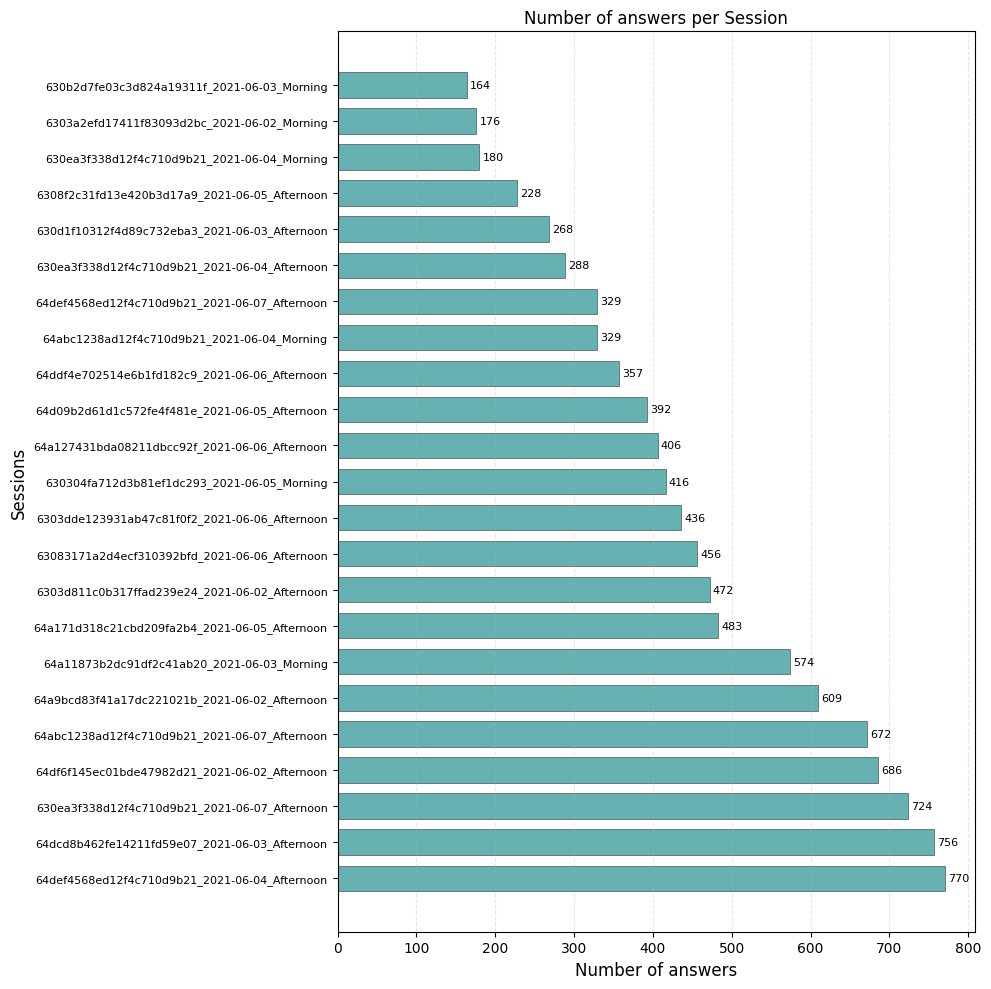

In [350]:
# Let's create the diagram
fig = plt.figure(figsize=(10,10))
plt.grid(axis='x', linestyle='--', alpha = 0.3) #alpha for the transparence
bars = plt.barh(nb_session.index, nb_session, color = 'teal', height=0.7, linewidth = 0.5, edgecolor = 'black', alpha = 0.6)
#adding exact value to the bars
for bar in bars:
    plt.text(
        bar.get_width()+ 4,               # x-coordinate + 4 padding
        bar.get_y() + bar.get_height()/2,  # y-coordinate
        f'{int(bar.get_width())}',      # label
        va='center', ha='left',         # alignment
        fontsize=8, color='black'
    )
#customization
plt.xlabel('Number of answers', fontsize=12)
plt.ylabel('Sessions', fontsize=12)
plt.yticks(fontsize=8)
plt.title('Number of answers per Session')
plt.tight_layout() # Adjusting the layout 

plt.show()


Let's now produce the graph showing each month and on a single graph, I’d like to have a view of the number of sessions each student participates in among the top 10% most active students.

Let's first analyse the feasibility of the graph.\
Let's see how many months we have answers for. \
Let's also check how many different sessions users have participated in. \

In [351]:
# How many months in the dataset
logs.month.value_counts()

month
6    10171
Name: count, dtype: int64

It appears that we only have 1 month (june) in our dataset. \
It will be difficult to visualize for each month as we have no data for other months.

In [352]:
# Grouping by users and counting unique session_id by group
unique_session_per_users = logs.groupby('user')['session_id'].nunique().reset_index()
# Renaming column name for clarity
unique_session_per_users.columns = ['user','number_session']
# Sorting the data in descending order
unique_session_per_users.sort_values(by='number_session', ascending= False, inplace=True)
# Checking the maximum of different session in our grouping request
print('The maximum number of session for a user is : ',unique_session_per_users['number_session'].max())

The maximum number of session for a user is :  1


Considering that 10% of the number of unique users (1861) is 186, it will also be hard to visualize the dashbord has in our case it will result in a line Graph with one point for the (months,nb_sessions) for 186 users as legend. This is quiet unreadable and not really insightfull. What can be done to solve this is first reduce the sample to may be top 5 users and collection data for a year for example to have enough data to analyse a specific trend in session activity per month.

Although we will not reply to the Product manager question here, we can produce a code to have the dedicated graph we suggest to PM.

In [353]:
# Function to generate random dates within a specific month
def generate_dates(year, month):
    num_days = calendar.monthrange(year, month)[1]  # Get the number of days in the month
    return [datetime(year, month, day).strftime('%Y-%m-%d') for day in range(1, num_days + 1)]

# Define the user IDs and event IDs
user_ids = [5112, 5530, 373, 6728, 2476, 6043, 9025, 8890, 1286, 6451]
event_ids = [
    '64def4568ed12f4c710d9b21', '630304fa712d3b81ef1dc293', 
    '6303d811c0b317ffad239e24', '64d09b2d61d1c572fe4f481e', 
    '64a11873b2dc91df2c41ab20', '64a171d318c21cbd209fa2b4', 
    '630ea3f338d12f4c710d9b21', '6303d811c0b317ffad239e24'
]

# Create an empty list to hold the data
data = []

# Generate data for each month
for month in range(1, 13):  # 1 to 12 for January to December
    dates = generate_dates(2021, month)  # Generate dates for the month
    for date in dates:
        # Randomly select users and event IDs for each date
        num_sessions = random.randint(1, 100)  # Number of sessions for this date
        for _ in range(num_sessions):
            user = random.choice(user_ids)
            event_id = random.choice(event_ids)
            period = 'Morning' if random.choice([True, False]) else 'Afternoon'
            data.append([user, event_id, date, period])

# Create DataFrame from the generated data
columns = ['user', 'event_id', 'date', 'period']
expanded_df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the new DataFrame
expanded_df.shape


(17894, 4)

In [354]:
# Let's convert date in our new dataFrame in date type and apply transformation to add our calculated columns
expanded_df['date'] = pd.to_datetime(expanded_df["date"])
expanded_df['month'] = expanded_df["date"].dt.month
expanded_df['session_id'] = expanded_df.apply(create_session_id, axis = 1)
expanded_df.sample(10)

,user,event_id,date,period,month,session_id
4685,5530,64d09b2d61d1c572fe4f481e,2021-03-31,Morning,3,64d09b2d61d1c572fe4f481e_2021-03-31_Morning
8711,5112,6303d811c0b317ffad239e24,2021-06-26,Morning,6,6303d811c0b317ffad239e24_2021-06-26_Morning
11108,6451,64a171d318c21cbd209fa2b4,2021-08-22,Afternoon,8,64a171d318c21cbd209fa2b4_2021-08-22_Afternoon
1821,6728,630ea3f338d12f4c710d9b21,2021-02-03,Morning,2,630ea3f338d12f4c710d9b21_2021-02-03_Morning
12899,5530,6303d811c0b317ffad239e24,2021-09-22,Afternoon,9,6303d811c0b317ffad239e24_2021-09-22_Afternoon
1881,6043,64d09b2d61d1c572fe4f481e,2021-02-05,Afternoon,2,64d09b2d61d1c572fe4f481e_2021-02-05_Afternoon
6693,6728,6303d811c0b317ffad239e24,2021-05-13,Morning,5,6303d811c0b317ffad239e24_2021-05-13_Morning
13071,8890,64d09b2d61d1c572fe4f481e,2021-09-27,Afternoon,9,64d09b2d61d1c572fe4f481e_2021-09-27_Afternoon
12066,8890,64a171d318c21cbd209fa2b4,2021-09-08,Afternoon,9,64a171d318c21cbd209fa2b4_2021-09-08_Afternoon
17860,6451,64a171d318c21cbd209fa2b4,2021-12-31,Morning,12,64a171d318c21cbd209fa2b4_2021-12-31_Morning


Let's now check the requirements to produce PM's Graph with our new database.

In [355]:
expanded_df.month.value_counts()

month
12    1854
1     1782
8     1581
4     1517
3     1500
9     1492
10    1434
6     1428
2     1419
11    1391
5     1281
7     1215
Name: count, dtype: int64

First we have sessions for every month

Let's find top 5 users with the most sessions

In [356]:
# Select the top 5 active users

users_activity = expanded_df.groupby('user')['session_id'].nunique().reset_index()
users_activity.columns = ['user', 'number_session']
#nlargest select the n line with the highest columns values
top5 = users_activity.nlargest(5,columns= "number_session")
top5

,user,number_session
4,5530,1462
2,2476,1444
9,9025,1443
5,6043,1430
7,6728,1425


Let's now retrieve data for only top 5 users

In [357]:
# Creating list of top 5 user
top5_ids = top5['user']
top5_ids
# Creating a DataFrame with data only for the top 5 users
df_filtered = expanded_df[expanded_df['user'].isin(top5_ids)]
df_filtered.head()


,user,event_id,date,period,month,session_id
1,6043,6303d811c0b317ffad239e24,2021-01-01,Morning,1,6303d811c0b317ffad239e24_2021-01-01_Morning
3,9025,6303d811c0b317ffad239e24,2021-01-01,Afternoon,1,6303d811c0b317ffad239e24_2021-01-01_Afternoon
5,2476,6303d811c0b317ffad239e24,2021-01-01,Afternoon,1,6303d811c0b317ffad239e24_2021-01-01_Afternoon
8,6728,64a11873b2dc91df2c41ab20,2021-01-01,Morning,1,64a11873b2dc91df2c41ab20_2021-01-01_Morning
9,2476,6303d811c0b317ffad239e24,2021-01-01,Afternoon,1,6303d811c0b317ffad239e24_2021-01-01_Afternoon


In [358]:
# Grouping by users and counting unique session_id by group
unique_session_per_users = df_filtered.groupby(['user','month'])['session_id'].nunique().reset_index()
# Renaming column name for clarity
unique_session_per_users.columns = ['user','month','number_session']
# Sorting the data in descending order
unique_session_per_users.sort_values(by=['user','month','number_session'], ascending= False, inplace=True)
# Checking the maximum of different session in our grouping request
print('The maximum number of session for a user is : ',unique_session_per_users['number_session'].max())

The maximum number of session for a user is :  159


In [359]:
unique_session_per_users.head()

,user,month,number_session
59,9025,12,138
58,9025,11,117
57,9025,10,118
56,9025,9,103
55,9025,8,126


PM's Graph

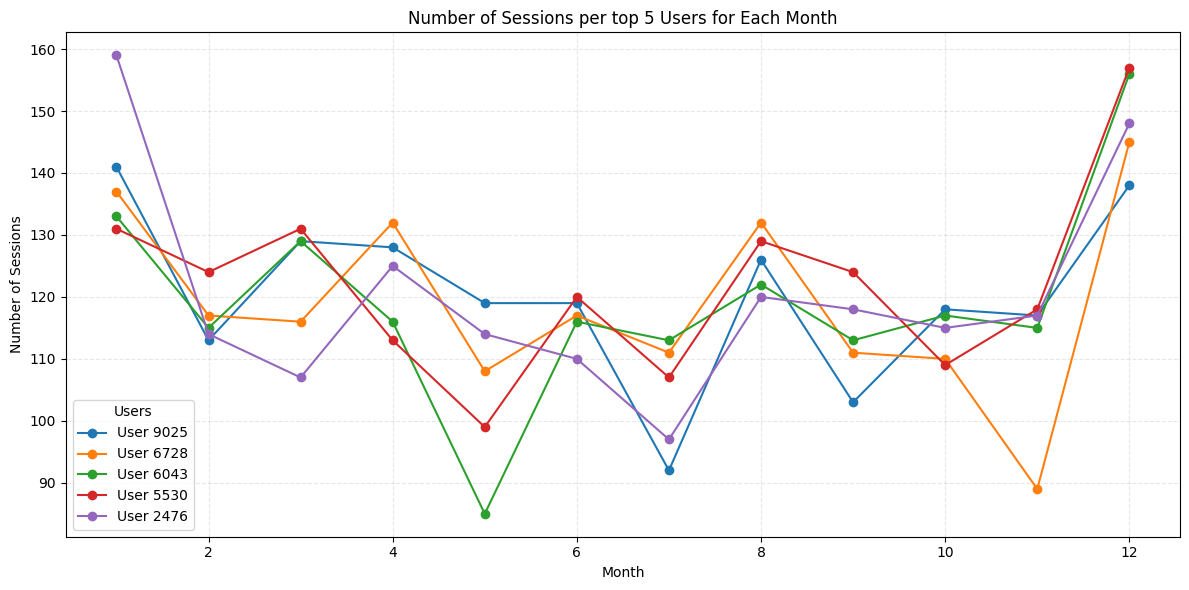

In [360]:
# Plotting
plt.figure(figsize=(12, 6))
# Creating a line for each user on the same figure
for user in unique_session_per_users['user'].unique():
    user_data = unique_session_per_users[unique_session_per_users['user'] == user]  # Filter data for the current user
    # Plotting each line for the unique users
    plt.plot(user_data['month'], user_data['number_session'], marker='o', label=f'User {user}')

# Adding labels and title
plt.title('Number of Sessions per top 5 Users for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.legend(title='Users')
plt.grid(linestyle='--', alpha = 0.3)
plt.tight_layout()
plt.show()